In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **PROFIL DATA**

In [183]:
# 1. Load Dataset
data_path = '/content/data.csv'
df = pd.read_csv(data_path)
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


### Interpretasi Kolom:

1.	Socioeconomic Score : Nilai indeks sosial ekonomi individu, yang menunjukkan tingkat status sosial ekonomi. Nilai berkisar antara 0 hingga 1, dengan nilai lebih tinggi menunjukkan status yang lebih baik.
2.	Study Hours : Jumlah rata-rata jam belajar individu setiap hari.
3.	Sleep Hours :  Jumlah rata-rata jam tidur individu setiap hari.
4.	Attendance (%) : Persentase kehadiran individu dalam kegiatan akademik (seperti kelas atau pelatihan).
5.	Grades : Nilai akademik individu yang mencerminkan performa belajar.


In [149]:
# Display initial rows and dataset info
print("Initial Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Initial Dataset Head:
   Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
0              0.95822          3.4          8.2            53.0    47.0
1              0.85566          3.2          5.9            55.0    35.0
2              0.68025          3.2          9.3            41.0    32.0
3              0.25936          3.2          8.2            47.0    34.0
4              0.60447          3.8         10.0            75.0    33.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB
None


In [150]:
df.columns

Index(['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)',
       'Grades'],
      dtype='object')

In [151]:
df.shape

(1388, 5)

In [152]:
# Ringkasan Data
df.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


# **DATA PREPROCESSING**

In [153]:
# 1. Memeriksa Nilai Kosong (Missing Values)
print("Jumlah nilai kosong pada setiap kolom:")
print(df.isnull().sum())

Jumlah nilai kosong pada setiap kolom:
Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64


In [154]:
# 2. Memeriksa Outlier pada Data Numerik
# Menggunakan metode IQR untuk mendeteksi outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\nJumlah outlier pada setiap kolom:")
print(outliers)


Jumlah outlier pada setiap kolom:
Socioeconomic Score     0
Study Hours            11
Sleep Hours             0
Attendance (%)         16
Grades                 23
dtype: int64


In [155]:
# 3. Normalisasi Data
scaler = MinMaxScaler()
columns_to_normalize = ['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)', 'Grades']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print("\nData setelah normalisasi:")
print(df.head())


Data setelah normalisasi:
   Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)    Grades
0             0.953703     0.282609     0.653846        0.216667  0.254237
1             0.839562     0.260870     0.211538        0.250000  0.050847
2             0.644345     0.260870     0.865385        0.016667  0.000000
3             0.175930     0.260870     0.653846        0.116667  0.033898
4             0.560008     0.326087     1.000000        0.583333  0.016949


In [156]:
# 4. Membagi Dataset menjadi Data Training dan Testing
X = df[['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']]
y = df['Grades']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

print("\nJumlah data training dan testing:")
print(f"Data Training: {X_train.shape[0]} baris")
print(f"Data Testing: {X_test.shape[0]} baris")


Jumlah data training dan testing:
Data Training: 1110 baris
Data Testing: 278 baris


# **EXPLORATORY DATA ANALYSIS**

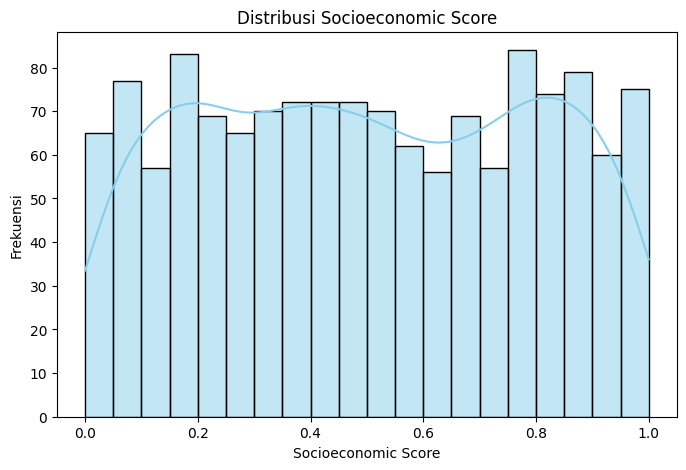

In [173]:
# Distribusi Socioeconomic Score
plt.figure(figsize=(8, 5))
sns.histplot(df['Socioeconomic Score'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Socioeconomic Score')
plt.xlabel('Socioeconomic Score')
plt.ylabel('Frekuensi')
plt.show()

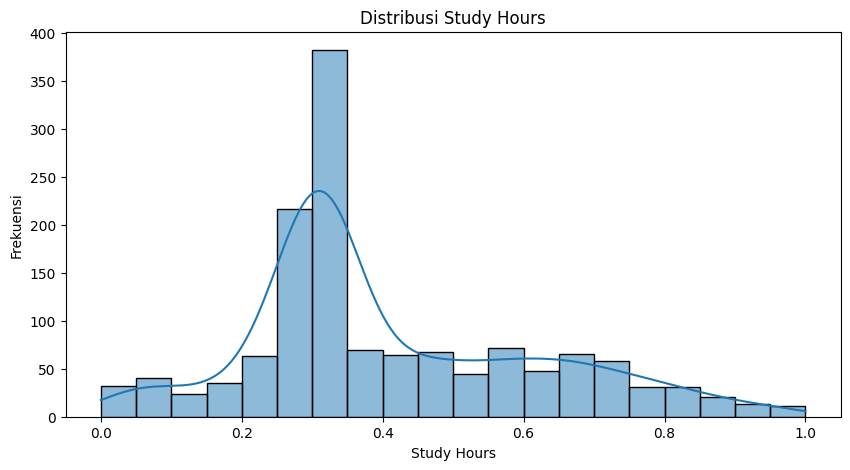

In [174]:
# Visualisasi distribusi Study Hours
plt.figure(figsize=(10, 5))
sns.histplot(df['Study Hours'], bins=20, kde=True)
plt.title('Distribusi Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frekuensi')
plt.show()

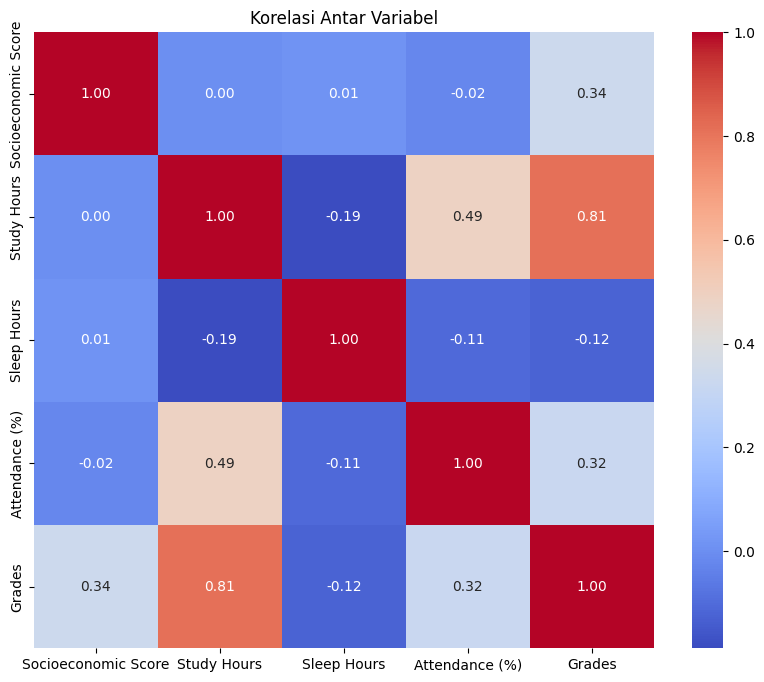

In [191]:
# Korelasi antar variabel
if 'Grade_Category' in df.columns:
    correlation_matrix = df.drop(columns=['Grade_Category']).corr()
else:
    correlation_matrix = df.corr()  # Calculate correlation without dropping

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel')
plt.show()

# **SELEKSI FITUR**

In [192]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi fitur (X) dan target (y)
X = df[['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']]
y = df['Grades']  # Menggunakan Grades secara langsung sebagai target

# Pembagian dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan informasi tentang fitur yang digunakan
print("Fitur yang digunakan untuk modeling:")
print(X.columns)

Fitur yang digunakan untuk modeling:
Index(['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)'], dtype='object')


# **MODELING**

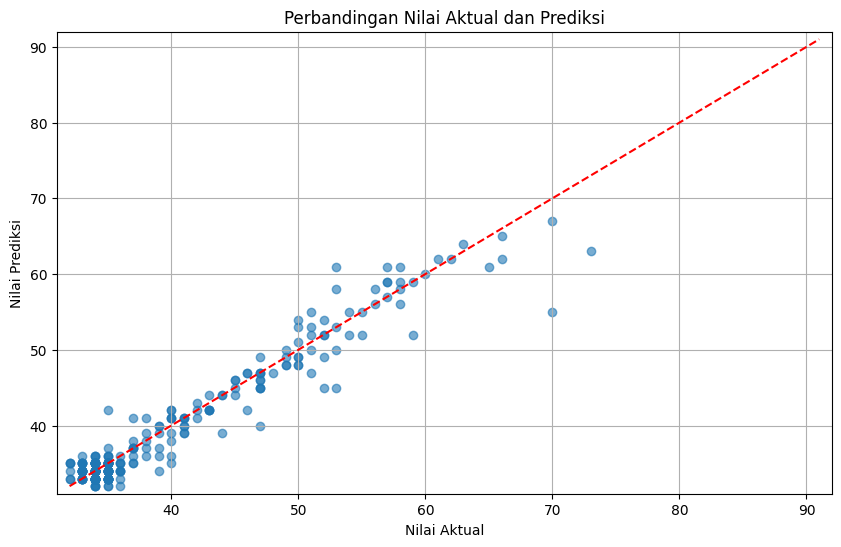

In [193]:
# Memisahkan data menjadi fitur (X) dan target (y)
X = df[['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']]
y = df['Grades']  # Menggunakan Grades secara langsung sebagai target

# Pembagian dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model dengan Decision Tree C4.5
model = DecisionTreeClassifier(criterion='entropy')  # Menggunakan C4.5
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)


# Visualisasi hasil dengan scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Garis acuan untuk prediksi sempurna
plt.title('Perbandingan Nilai Aktual dan Prediksi')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.xlim(y.min() - 1, y.max() + 1)
plt.ylim(y.min() - 1, y.max() + 1)
plt.grid()
plt.show()

# **EVALUASI MODEL**

In [190]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan prediksi
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.2f}')

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Akurasi Model: 0.28
Classification Report:
              precision    recall  f1-score   support

        32.0       0.00      0.00      0.00         6
        33.0       0.15      0.24      0.18        25
        34.0       0.45      0.40      0.42        72
        35.0       0.34      0.29      0.31        48
        36.0       0.08      0.10      0.09        10
        37.0       0.57      0.44      0.50         9
        38.0       0.25      0.20      0.22         5
        39.0       0.17      0.17      0.17         6
        40.0       0.00      0.00      0.00         9
        41.0       0.43      0.43      0.43         7
        42.0       0.12      0.33      0.18         3
        43.0       0.00      0.00      0.00         5
        44.0       0.33      0.33      0.33         3
        45.0       0.29      0.50      0.36         4
        46.0       0.20      0.33      0.25         3
        47.0       0.50      0.30      0.38        10
        48.0       0.00      0.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_